# EEG Classification Model

## 1.Data Preprocessing

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dir_path = './Second dataset/'

In [6]:
# Function to load EEG data from a set of files
def load_eeg_data(path):
    eeg_data = []
    file_names = os.listdir(path)
    file_names.sort()
    for file_name in file_names:
        file_path = os.path.join(path, file_name)
        with open(file_path, 'r') as file:  # Fix: Use file_path instead of path
            # Read the file and convert the data to integers
            data = [int(line.strip()) for line in file.readlines()]
            eeg_data.append(data)
    return np.array(eeg_data)

# Load EEG data from Set F
set_f_path = os.path.join(dir_path, 'f')
eeg_data_set_f = load_eeg_data(set_f_path)
eeg_data_set_n = load_eeg_data(os.path.join(dir_path, 'n'))
eeg_data_set_o = load_eeg_data(os.path.join(dir_path, 'o'))
eeg_data_set_s = load_eeg_data(os.path.join(dir_path, 's'))
eeg_data_set_z = load_eeg_data(os.path.join(dir_path, 'z'))

# Checking the shape of the loaded data
print(eeg_data_set_f.shape)
print(eeg_data_set_n.shape)
print(eeg_data_set_o.shape)
print(eeg_data_set_s.shape)
print(eeg_data_set_z.shape)

(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)


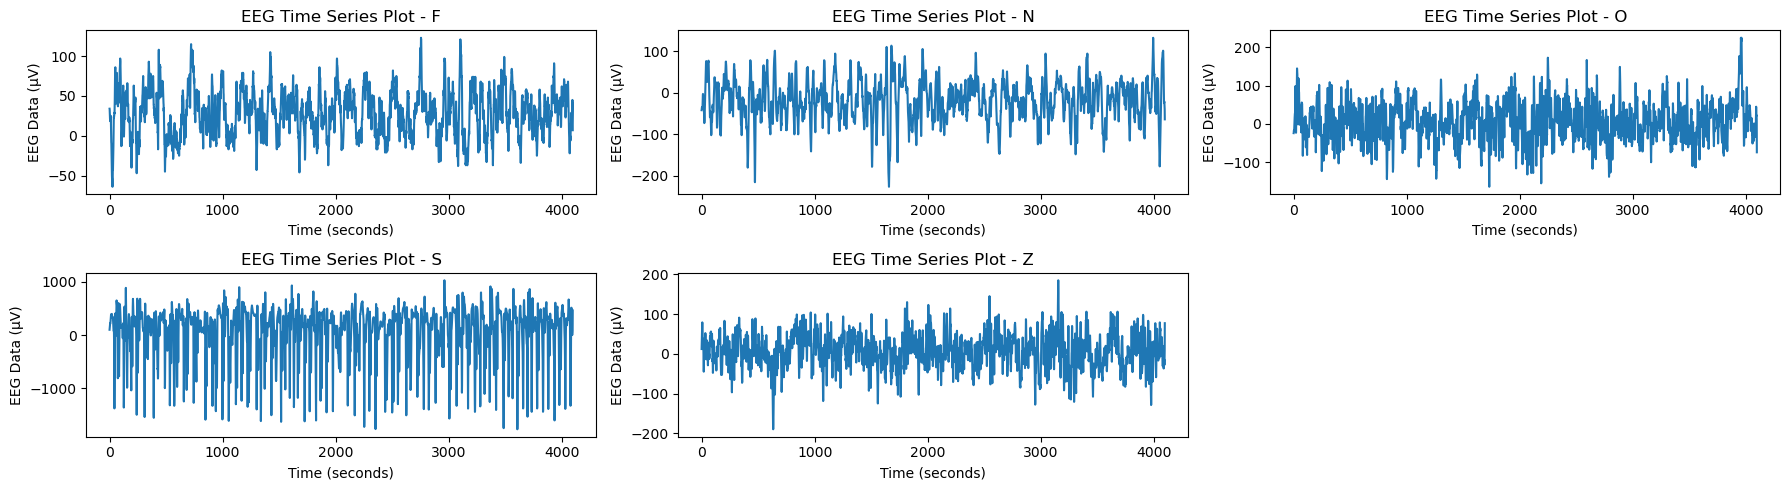

In [38]:
# Plot the time series
plt.figure(figsize=(18,5))

plt.subplot(231)
plt.plot(eeg_data_set_f[0])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Data (µV)')
plt.title('EEG Time Series Plot - F')

plt.subplot(232)
plt.plot(eeg_data_set_n[0])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Data (µV)')
plt.title('EEG Time Series Plot - N')


plt.subplot(233)
plt.plot(eeg_data_set_o[0])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Data (µV)')
plt.title('EEG Time Series Plot - O')


plt.subplot(234)
plt.plot(eeg_data_set_s[0])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Data (µV)')
plt.title('EEG Time Series Plot - S')


plt.subplot(235)
plt.plot(eeg_data_set_z[0])
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Data (µV)')
plt.title("EEG Time Series Plot - Z")

plt.tight_layout()
plt.show()

### Checking for Missing Values

In [40]:
# Checking for missing or anomalous values in the dataset
def check_missing_values(data):
    # Checking if there are any NaN values or extremely large values that might indicate missing or corrupt data
    nan_count = np.isnan(data).sum()
    extreme_values_count = np.sum(np.abs(data) > 1e6)  # Assuming values greater than 1e6 are anomalously large for EEG
    return nan_count, extreme_values_count

# Checking the Set F data
missing_values_count_f, extreme_values_count_f = check_missing_values(eeg_data_set_f)
missing_values_count_n, extreme_values_count_n = check_missing_values(eeg_data_set_n)
missing_values_count_o, extreme_values_count_o = check_missing_values(eeg_data_set_o)
missing_values_count_s, extreme_values_count_s = check_missing_values(eeg_data_set_s)
missing_values_count_z, extreme_values_count_z = check_missing_values(eeg_data_set_z)

# Output the results
print("Missing Values in F",missing_values_count_f,"; Extreme Values in F", extreme_values_count_f)
print("Missing Values in N",missing_values_count_n,"; Extreme Values in N",extreme_values_count_n)
print("Missing Values in O",missing_values_count_o,"; Extreme Values in O",extreme_values_count_o)
print("Missing Values in S",missing_values_count_s,"; Extreme Values in S",extreme_values_count_s)
print("Missing Values in Z",missing_values_count_z,"; Extreme Values in Z",extreme_values_count_z)

Missing Values in F 0 ; Extreme Values in F 0
Missing Values in N 0 ; Extreme Values in N 0
Missing Values in O 0 ; Extreme Values in O 0
Missing Values in S 0 ; Extreme Values in S 0
Missing Values in Z 0 ; Extreme Values in Z 0


### Noise Reduction

In [41]:
from scipy.signal import butter, filtfilt

# Function to apply a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Applying bandpass filter to each EEG recording
# Assuming a sampling rate (fs) of 256 Hz for EEG data
fs = 256
lowcut = 1.0  # Low frequency cut-off in Hz
highcut = 50.0  # High frequency cut-off in Hz

filtered_eeg_data_set_f = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_f])
filtered_eeg_data_set_n = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_n])
filtered_eeg_data_set_o = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_o])
filtered_eeg_data_set_s = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_s])
filtered_eeg_data_set_z = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_z])

# Checking the shape of the filtered data
print(filtered_eeg_data_set_f.shape)
print(filtered_eeg_data_set_n.shape)
print(filtered_eeg_data_set_o.shape)
print(filtered_eeg_data_set_s.shape)
print(filtered_eeg_data_set_z.shape)


(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)


### Normalization

In [42]:
from sklearn.preprocessing import StandardScaler

# Function to normalize data
def normalize_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

# Normalizing the filtered EEG data
normalized_eeg_data_set_f = normalize_data(filtered_eeg_data_set_f)
normalized_eeg_data_set_n = normalize_data(filtered_eeg_data_set_n)
normalized_eeg_data_set_o = normalize_data(filtered_eeg_data_set_o)
normalized_eeg_data_set_s = normalize_data(filtered_eeg_data_set_s)
normalized_eeg_data_set_z = normalize_data(filtered_eeg_data_set_z)

# Checking the mean and standard deviation of the normalized data
mean_normalized_f = np.mean(normalized_eeg_data_set_f)
std_normalized_f = np.std(normalized_eeg_data_set_f)

mean_normalized_n = np.mean(normalized_eeg_data_set_n)
std_normalized_n = np.std(normalized_eeg_data_set_n)

mean_normalized_o = np.mean(normalized_eeg_data_set_o)
std_normalized_o = np.std(normalized_eeg_data_set_o)

mean_normalized_s = np.mean(normalized_eeg_data_set_s)
std_normalized_s = np.std(normalized_eeg_data_set_s)

mean_normalized_z = np.mean(normalized_eeg_data_set_z)
std_normalized_z = np.std(normalized_eeg_data_set_z)

print("Normalized Mean: ",mean_normalized_f,"; Normalized Standard Deviation: ", std_normalized_f)
print("Normalized Mean: ",mean_normalized_n,"; Normalized Standard Deviation: ", std_normalized_n)
print("Normalized Mean: ",mean_normalized_o,"; Normalized Standard Deviation: ", std_normalized_o)
print("Normalized Mean: ",mean_normalized_s,"; Normalized Standard Deviation: ", std_normalized_s)
print("Normalized Mean: ",mean_normalized_z,"; Normalized Standard Deviation: ", std_normalized_z)


Normalized Mean:  2.954271763354517e-18 ; Normalized Standard Deviation:  0.9999999999999997
Normalized Mean:  1.0405800377253115e-19 ; Normalized Standard Deviation:  0.9999999999999999
Normalized Mean:  -4.769325172907678e-20 ; Normalized Standard Deviation:  1.0
Normalized Mean:  1.0926090396115771e-18 ; Normalized Standard Deviation:  1.0
Normalized Mean:  -1.821015066019295e-19 ; Normalized Standard Deviation:  0.9999999999999998


### Data Augmentation

In [47]:
# Function to augment data by adding random noise
def augment_data_with_noise(data, noise_level=0.01):
    augmented_data = []
    for sample in data:
        noise = np.random.normal(0, noise_level, sample.shape)
        augmented_sample = sample + noise
        augmented_data.append(augmented_sample)
    return np.array(augmented_data)

# Augmenting the normalized EEG data with random noise
augmented_eeg_data_set_f = augment_data_with_noise(normalized_eeg_data_set_f)
augmented_eeg_data_set_n = augment_data_with_noise(normalized_eeg_data_set_n)
augmented_eeg_data_set_o = augment_data_with_noise(normalized_eeg_data_set_o)
augmented_eeg_data_set_s = augment_data_with_noise(normalized_eeg_data_set_s)
augmented_eeg_data_set_z = augment_data_with_noise(normalized_eeg_data_set_z)

# Checking the shape of the augmented data
print(augmented_eeg_data_set_f.shape)
print(augmented_eeg_data_set_n.shape)
print(augmented_eeg_data_set_o.shape)
print(augmented_eeg_data_set_s.shape)
print(augmented_eeg_data_set_z.shape)


(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)


## Feature Extraction

In [48]:
import scipy.stats
from scipy.fft import rfft
from scipy.signal import welch

# Function to extract time-domain features
def extract_time_domain_features(data):
    # Initializing lists to store features
    means, medians, stds, variances, skews, kurtoses = [], [], [], [], [], []

    # Extracting statistical features
    for sample in data:
        means.append(np.mean(sample))
        medians.append(np.median(sample))
        stds.append(np.std(sample))
        variances.append(np.var(sample))
        skews.append(scipy.stats.skew(sample))
        kurtoses.append(scipy.stats.kurtosis(sample))
    
    return np.array([means, medians, stds, variances, skews, kurtoses]).T

# Function to extract Hjorth parameters
def extract_hjorth_parameters(data):
    activity = np.var(data, axis=1)
    mobility = np.sqrt(np.var(np.gradient(data, axis=1), axis=1) / activity)
    complexity = np.sqrt(np.var(np.gradient(np.gradient(data, axis=1), axis=1), axis=1) / np.var(np.gradient(data, axis=1), axis=1)) / mobility
    return np.array([activity, mobility, complexity]).T

# Function to extract frequency-domain features (using Power Spectral Density)
def extract_frequency_domain_features(data, fs):
    psd_features = []
    for sample in data:
        freqs, psd = welch(sample, fs)
        psd_features.append(psd)
    return np.array(psd_features)

# Extracting features
time_domain_features_f = extract_time_domain_features(augmented_eeg_data_set_f)
hjorth_parameters_f = extract_hjorth_parameters(augmented_eeg_data_set_f)
frequency_domain_features_f = extract_frequency_domain_features(augmented_eeg_data_set_f, fs)

time_domain_features_n = extract_time_domain_features(augmented_eeg_data_set_n)
hjorth_parameters_n = extract_hjorth_parameters(augmented_eeg_data_set_n)
frequency_domain_features_n = extract_frequency_domain_features(augmented_eeg_data_set_n, fs)

time_domain_features_o = extract_time_domain_features(augmented_eeg_data_set_o)
hjorth_parameters_o = extract_hjorth_parameters(augmented_eeg_data_set_o)
frequency_domain_features_o = extract_frequency_domain_features(augmented_eeg_data_set_o, fs)

time_domain_features_s = extract_time_domain_features(augmented_eeg_data_set_s)
hjorth_parameters_s = extract_hjorth_parameters(augmented_eeg_data_set_s)
frequency_domain_features_s = extract_frequency_domain_features(augmented_eeg_data_set_s, fs)

time_domain_features_z = extract_time_domain_features(augmented_eeg_data_set_z)
hjorth_parameters_z = extract_hjorth_parameters(augmented_eeg_data_set_z)
frequency_domain_features_z = extract_frequency_domain_features(augmented_eeg_data_set_z, fs)

# Combining features
combined_features_f = np.hstack((time_domain_features_f, hjorth_parameters_f, frequency_domain_features_f))
combined_features_n = np.hstack((time_domain_features_n, hjorth_parameters_n, frequency_domain_features_n))
combined_features_o = np.hstack((time_domain_features_o, hjorth_parameters_o, frequency_domain_features_o))
combined_features_s = np.hstack((time_domain_features_s, hjorth_parameters_s, frequency_domain_features_s))
combined_features_z = np.hstack((time_domain_features_z, hjorth_parameters_z, frequency_domain_features_z))


print(combined_features_f.shape)
print(combined_features_n.shape)
print(combined_features_o.shape)
print(combined_features_s.shape)
print(combined_features_z.shape)

(100, 138)
(100, 138)
(100, 138)
(100, 138)
(100, 138)


In [49]:
# Combining Non-Seizure datasets into one dataset.
non_seizure=np.vstack((combined_features_f,combined_features_n,combined_features_o,combined_features_z))
seizure=combined_features_s

## Data Splitting

In [67]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assigning labels: 0 for non_seizure, 1 for seizure
non_seizure_labels = np.zeros(non_seizure.shape[0])
seizure_labels = np.ones(seizure.shape[0])

# Combining the features and labels
X = np.vstack((non_seizure, seizure))
y = np.concatenate((non_seizure_labels, seizure_labels))

# Encoding the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 138), (100, 138), (400,), (100,))

## Model Selection and Model Training

In [68]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        76
           1       1.00      0.12      0.22        24

    accuracy                           0.79       100
   macro avg       0.89      0.56      0.55       100
weighted avg       0.84      0.79      0.72       100



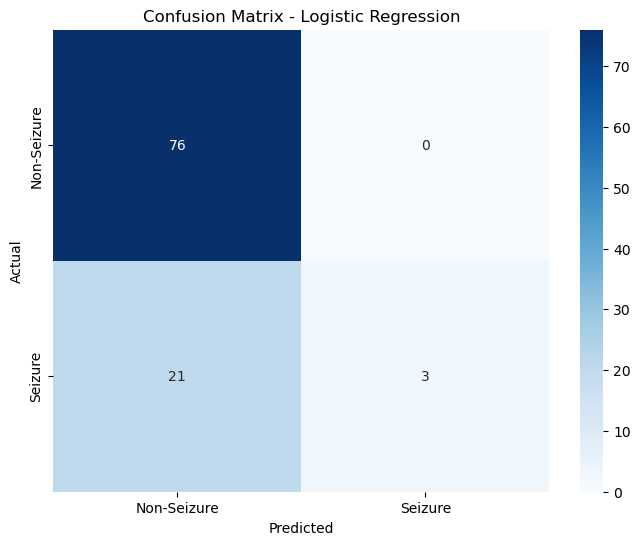

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Detailed classification report
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)


Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        76
           1       1.00      0.75      0.86        24

    accuracy                           0.94       100
   macro avg       0.96      0.88      0.91       100
weighted avg       0.94      0.94      0.94       100



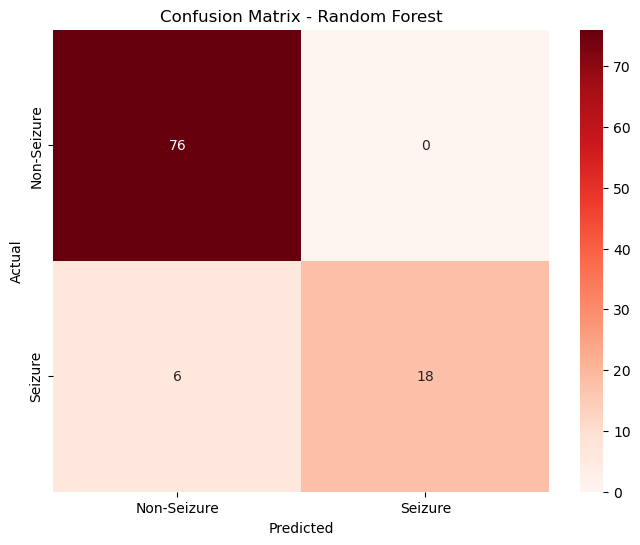

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [75]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

# Detailed classification report
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        76
           1       0.84      0.67      0.74        24

    accuracy                           0.89       100
   macro avg       0.87      0.81      0.84       100
weighted avg       0.89      0.89      0.89       100



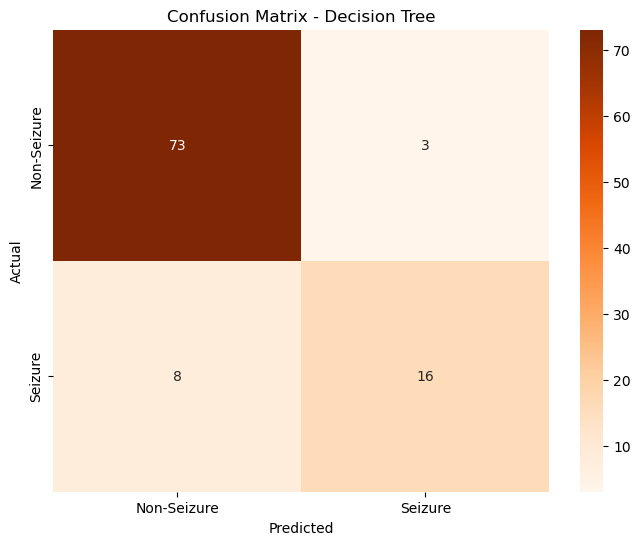

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Oranges', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [77]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load your training and testing data (X_train, y_train, X_test, y_test)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')  # You can choose different kernels based on your data

# Train the SVM model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = clf.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# Detailed classification report
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        76
           1       1.00      0.17      0.29        24

    accuracy                           0.80       100
   macro avg       0.90      0.58      0.58       100
weighted avg       0.84      0.80      0.74       100



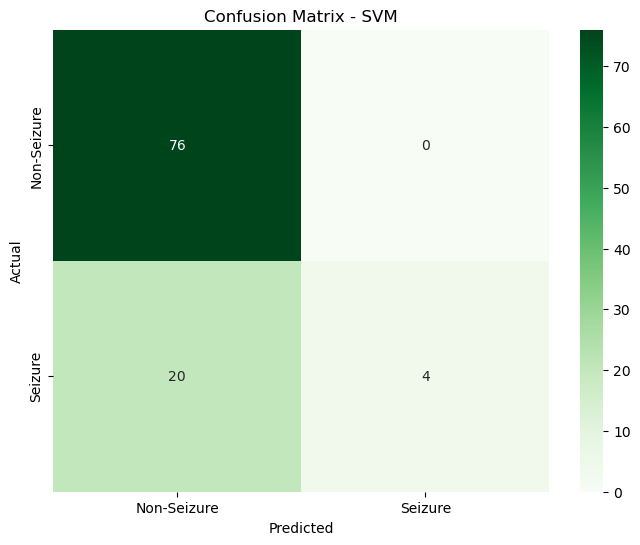

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

In [79]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [80]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_n.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [84]:
# Train the model
history = model.fit(X_train_n, y_train, epochs=10, batch_size=32, validation_data=(X_test_n, y_test))


Epoch 1/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1527 - accuracy: 0.9425 - val_loss: 0.2409 - val_accuracy: 0.9000
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.9700 - val_loss: 0.2184 - val_accuracy: 0.9200
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1041 - accuracy: 0.9625 - val_loss: 0.2342 - val_accuracy: 0.9100
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0925 - accuracy: 0.9675 - val_loss: 0.2042 - val_accuracy: 0.9200
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1132 - accuracy: 0.9625 - val_loss: 0.1905 - val_accuracy: 0.9300
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0915 - accuracy: 0.9775 - val_loss: 0.1830 - val_accuracy: 0.9300
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0857 - accuracy: 0.9625 - val_loss: 0.2015 - val_accuracy: 0.9300
Epoch 8/10
13/13 [==

In [85]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_n, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")


4/4 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9300
Test accuracy: 0.93


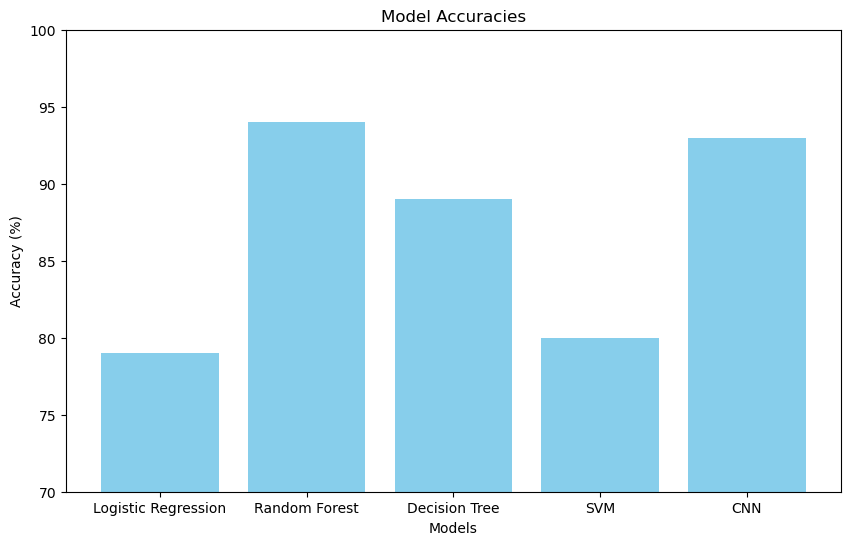

In [87]:
import matplotlib.pyplot as plt

# Creating a dictionary of the given models and their accuracies
model_accuracies = {
    "Logistic Regression": accuracy*100,
    "Random Forest": accuracy_rf*100,
    "Decision Tree": accuracy_dt*100,
    "SVM": accuracy_svm*100,
    "CNN": test_accuracy*100
}

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim([70, 100])  # Setting y-axis limits for better visualization
#plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()


# Best Model - Random Forest